In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
#Code to get multiple outputs in the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

#Code to ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

In [77]:
df=pd.read_csv(r"C:\Users\97158\Desktop\Apziva\Project 2-Term Deposit Marketing\term-deposit-marketing-2020.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [78]:
df.describe()
df.describe(include='O')

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


,job,marital,education,default,housing,loan,contact,month,y
count,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,12,3,4,2,2,2,3,11,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,no
freq,9383,24386,20993,39191,24031,33070,24914,13532,37104


In [79]:
df['education'].unique()
df['job'].unique()
df['contact'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [80]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [81]:
df_T=df.groupby(['y']).agg({'campaign':'count','duration':'mean','balance':'mean','age':'mean'}).reset_index().sort_values(by='balance')
df_T

,y,campaign,duration,balance,age
0,no,37104,221.408042,1249.752533,40.599208
1,yes,2896,682.958564,1588.495856,39.844959


From above it seems like a lot less time was spent with customers that said no despite really high number of campaigns compared to customers that said yes. Indicating correlation between y label and duration. 

In [82]:
# Seperating Target/Numerical/Categorical variables

y=df['y']
x=df

print('x Set Shape:', x.shape)
print('y Set Shape:', y.shape)


x Set Shape: (40000, 14)
y Set Shape: (40000,)


Seperating out train-test-validation sets

Since this is the only data available to us, we keep aside a holdout/test set to evaluate our model at the very end in order to estimate our chosen model's performance on unseen data/new data. 

A validatoin set will also be created as a basline model and to evaluate and tune our model(s).

We are performing this aplit here inorder to reduce potential data leakage

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
#Train/Test Split
x_train_val, x_test, y_train_val, y_test=train_test_split(x,y,test_size=0.1,random_state=42)


#Train/Validation Split
x_train,x_val,y_train,y_val=train_test_split(x_train_val,y_train_val, test_size=0.12, random_state=42)

In [85]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
797,39,management,married,tertiary,no,305,yes,no,unknown,7,may,275,6,no
39220,29,management,married,tertiary,no,318,yes,no,cellular,18,may,1434,2,no
11602,47,admin,married,secondary,no,4923,no,no,unknown,19,jun,121,3,no
6499,39,management,married,tertiary,no,-342,yes,no,unknown,27,may,110,2,no
17643,26,blue-collar,single,secondary,no,114,no,yes,cellular,29,jul,361,4,no


In [86]:
print('X_train Set: ',x_train.shape,' / ','Y_Train Set: ',y_train.shape)
print('X_Test Set: ', x_test.shape,' / ', 'Y_Test Set: ',y_test.shape)
print('X_CV Set: ',x_val.shape,' / ','Y_CV Set: ',y_val.shape)



X_train Set:  (31680, 14)  /  Y_Train Set:  (31680,)
X_Test Set:  (4000, 14)  /  Y_Test Set:  (4000,)
X_CV Set:  (4320, 14)  /  Y_CV Set:  (4320,)


Univariate Analysis - Performing a quick highlevel overvieew of outliers and distribution



array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>, <Axes: >]], dtype=object)

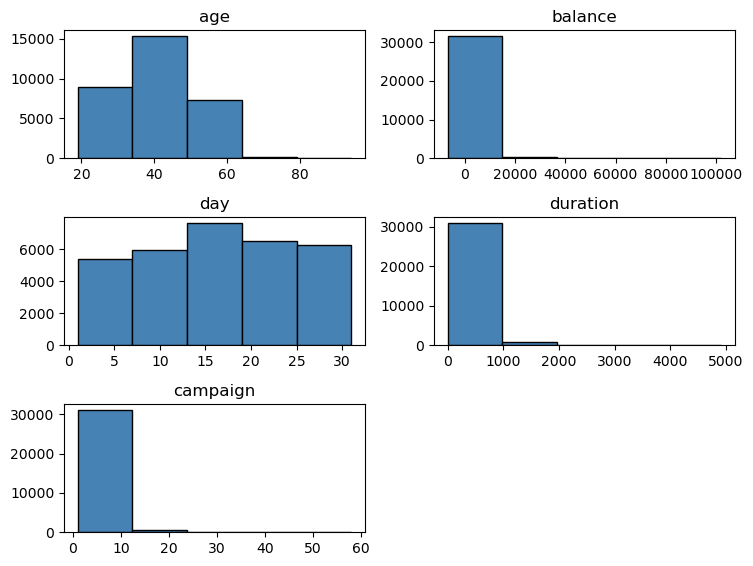

In [87]:
#visulaizing distribution

x_train.hist(bins=5, color='steelblue', edgecolor='black',  grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

<Axes: title={'center': 'boxplot'}>

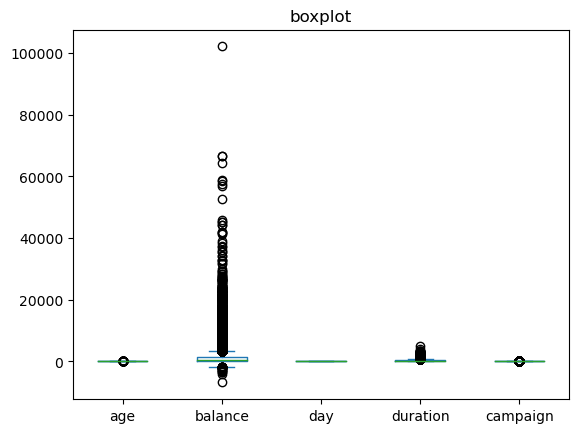

In [88]:
x_train[['age','balance','day','duration','campaign']].plot(kind='box',title='boxplot')

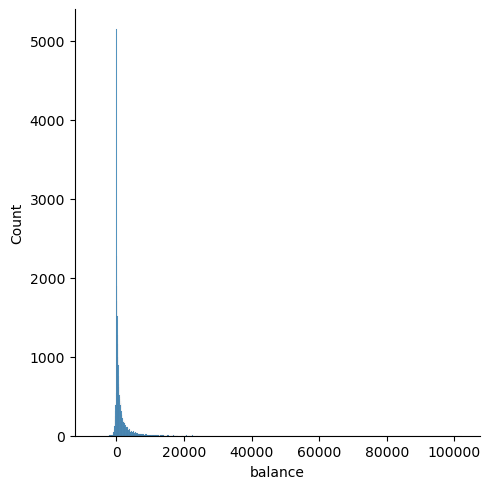

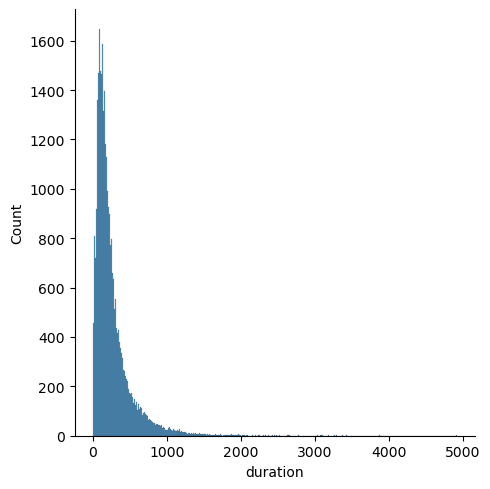

In [89]:
sns.displot(x_train['balance'])
sns.displot(x_train['duration'])

- From above we see that balance and duration are widely distributed and have some outliers

- Age and day show normal distribution



In [90]:
x_train['balance'].describe()

x_train['duration'].describe()


count     31680.000000
mean       1277.189520
std        2883.472225
min       -6847.000000
25%          54.000000
50%         411.000000
75%        1323.000000
max      102127.000000
Name: balance, dtype: float64

count    31680.000000
mean       254.111585
std        258.211980
min          0.000000
25%         99.000000
50%        175.000000
75%        312.000000
max       4918.000000
Name: duration, dtype: float64

In [91]:
#Treating Outliers 

# Finding IQRs

percentile25=x_train['balance'].quantile(0.25)
percentile75=x_train['balance'].quantile(0.75)

percentile25_dur=x_train['duration'].quantile(0.25)
percentile75_dur=x_train['duration'].quantile(0.75)

In [92]:
iqr=percentile75-percentile25
iqr_dur=percentile75_dur-percentile25_dur


upper_limit= percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

upper_limit_dur= percentile75_dur+1.5*iqr_dur
lower_limit_dur=percentile25_dur-1.5*iqr_dur


print('Balance max:', x_train['balance'].max(),'\n','Balance min:',x_train['balance'].min())
print('Balance Upper limit:',upper_limit,'\n','Balance lower limit',lower_limit)

Balance max: 102127 
 Balance min: -6847
Balance Upper limit: 3226.5 
 Balance lower limit -1849.5


In [93]:
outliers_upper=x_train[x_train['balance']>upper_limit]
print('% points outside upperlimit:',round(100*(outliers_upper.shape[0]/x_train.shape[0])),2,'%')

% points outside upperlimit: 11 2 %


In [94]:
outliers_upper_dur=x_train[x_train['duration']>upper_limit_dur]
print('% points outside upperlimit:',round(100*(outliers_upper_dur.shape[0]/x_train.shape[0])),2,'%')

% points outside upperlimit: 7 2 %


From above we see that the feature 'balance' is not Gaussian or Gaussian like. This prevents us from using Standard deviation method for outlier tratment. There are also too many records outside IQR to effectively ignore/exclude them from our analysis; thus we will not employ IQR method for outlier treatment. In addition, because capping involves  IQR's upper and lower limit, we will not be pursuing any outlier traatment. 

# Categorical Encoding

In [95]:
#Encoding categorical columns

print('Categorical columns and no. of unique values: ')
x_train.select_dtypes(include='O').nunique()

Categorical columns and no. of unique values: 


job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        11
y             2
dtype: int64

We have 9 categorical columns in the dataset including the target variable. 

Columns to undergo label encoding: <br>
default <br>
housing <br>
loan <br>
Target variable 'y' will be label encoded. 

Columns to undergo Ordinal Encoding: <br>
education <br>
month <br>

Columns to undergo One-Hot Encoding: <br>
job <br>
marital <br>
contact

In [96]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [97]:
label_col = ['default','housing','loan']
label_col_with_y = ['default','housing','loan','y']
Ordinal_col=['education','month']
Ohe_col=['job','marital','contact']

In [98]:
le=LabelEncoder()
oe=OrdinalEncoder()
ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)

# Will be encoding only on train dataset as thats the only data we assume we have. We'll treat validation 
# and test sets as unseen data. Hence they cant be used for fitting the encoders. 

In [99]:
# Encoding train_set columns:

x_train[label_col] = x_train[label_col].apply(le.fit_transform)
y_train=le.fit_transform(y_train)
x_train[Ordinal_col] = oe.fit_transform(x_train[Ordinal_col])
x_train=pd.get_dummies(x_train,sparse=False,dtype=int)

In [100]:
# Applying the same across the test and validation set. 
x_test[label_col] = x_test[label_col].apply(le.fit_transform)
y_test=le.fit_transform(y_test)
x_test[Ordinal_col] = oe.fit_transform(x_test[Ordinal_col])
x_test=pd.get_dummies(x_test,columns=Ohe_col,dtype=int)

x_val[label_col] = x_val[label_col].apply(le.fit_transform)
y_val=le.fit_transform(y_val)
x_val[Ordinal_col] = oe.fit_transform(x_val[Ordinal_col])
x_val=pd.get_dummies(x_val,columns=Ohe_col,dtype=int)


In [101]:
x_val.shape
y_val.shape

(4320, 29)

(4320,)

# Feature Scaling

In [102]:
from sklearn.preprocessing import RobustScaler

In [103]:
cont_var=['age','balance','day','duration','campaign']

scaler=RobustScaler()

x_train_scaled=scaler.fit_transform(x_train[cont_var])

x_train_scaled=pd.DataFrame(x_train_scaled,columns=cont_var)
x_train_scaled.reset_index(drop=True, inplace=True)

In [104]:
x_train.drop(cont_var,axis=1,inplace=True)
x_train.reset_index(drop=True, inplace=True)
x_train=pd.concat([x_train,x_train_scaled],axis=1).reindex(x_train.index)

In [105]:
x_test_scaled=scaler.fit_transform(x_test[cont_var])
x_test_scaled=pd.DataFrame(x_test_scaled,columns=cont_var)
x_test_scaled.reset_index(drop=True, inplace=True) 

x_test.drop(cont_var,axis=1,inplace=True)
x_test.reset_index(drop=True, inplace=True)
x_test=pd.concat([x_test,x_test_scaled],axis=1).reindex(x_test.index)   



x_val_scaled=scaler.fit_transform(x_val[cont_var])
x_val_scaled=pd.DataFrame(x_val_scaled,columns=cont_var)
x_val_scaled.reset_index(drop=True, inplace=True) 

x_val.drop(cont_var,axis=1,inplace=True)
x_val.reset_index(drop=True, inplace=True)
x_val=pd.concat([x_val,x_val_scaled],axis=1).reindex(x_val.index)  


In [106]:
x_val.shape
y_val.shape

(4320, 29)

(4320,)

# Feature Engineering

<Figure size 2000x800 with 0 Axes>

<Axes: >

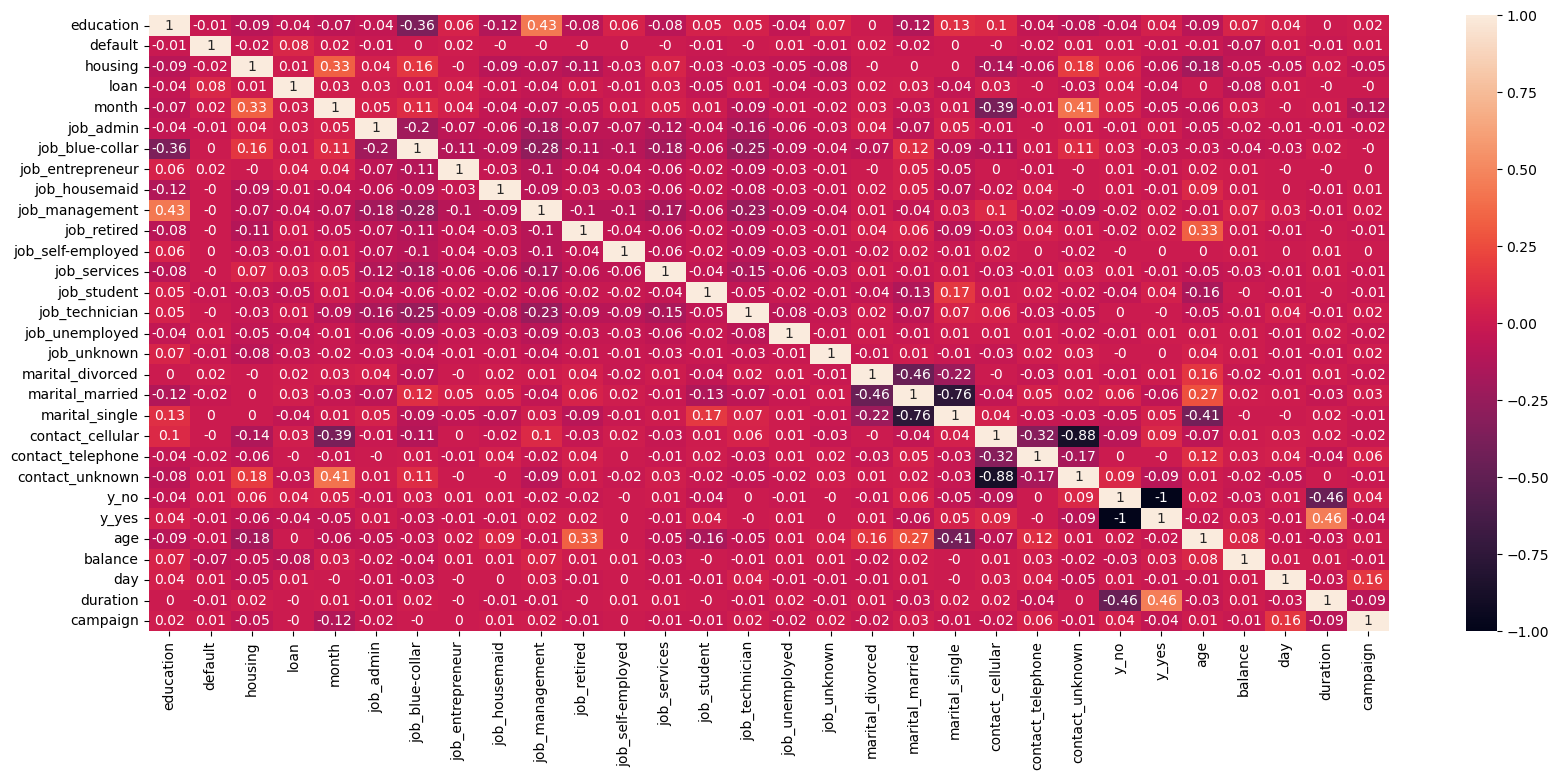

In [107]:
plt.figure(figsize=(20,8))
corr=round(x_train.corr(),2)
sns.heatmap(corr,annot=True)
plt.show()

In [108]:
#Dropping Y label from train set


x_train.drop(['y_no','y_yes'], axis=1,inplace=True)
x_test.drop(['y'], axis=1,inplace=True)
x_val.drop(['y'], axis=1,inplace=True)

From above we see 'Duration' is the only feature that is showing correlation with Y labels. 

In [109]:
# Performing Recursive Feature Engineering
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from numpy import std
from numpy import mean



x_train.shape
y_train.shape

(31680, 28)

(31680,)

An important hyperparameter for the RFE algorithm is the 'number of features to select'. Because we do not know the best number of features to select, we will test out different values of features and see which feature/model returns better F1_score acorss the defined set of feature range.
Below I demonstrate selecting different numbers of features from 2 to 28.

In [110]:
# Get a list of models to evaluate

def get_models():
    models=dict()
    for i in range(2,28):
        rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=i)
        model=DecisionTreeClassifier()
        models[str(i)]=make_pipeline(rfe, model)
    return models

In [111]:
#Evaluating a given model model using Cross Validation

def evaluate_model(model, x_train, y_train):
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    scores=cross_val_score(model,x_train,y_train,scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [112]:
#getting the models to evaluate
models=get_models()

#evluating the models and storing results
results,names=list(),list()
for name, model in models.items():
    scores=evaluate_model(model,x_train,y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name, mean(scores),std(scores)))

#plot for model performance and comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

From above we see, after addition of 12 columns, the f1_Score of our model tapers off at 0.69. Thus we will be choosing 12 as our n_features_to_select. From here we will explore the top 12 columns that explain most of the patterns/behaviour/trends in our training dataset. 

In [113]:
#Defing RFE
rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=12)

#Fit RFE
rfe.fit(x_train,y_train)

#Summarizing all features
for i in range(x_train.shape[1]):
    print('Column: %d, Selected %s, RankL %.2f' %(i,rfe.support_[i],rfe.ranking_[i]))

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)

Column: 0, Selected True, RankL 1.00
Column: 1, Selected False, RankL 15.00
Column: 2, Selected True, RankL 1.00
Column: 3, Selected False, RankL 5.00
Column: 4, Selected True, RankL 1.00
Column: 5, Selected False, RankL 2.00
Column: 6, Selected True, RankL 1.00
Column: 7, Selected False, RankL 12.00
Column: 8, Selected False, RankL 13.00
Column: 9, Selected True, RankL 1.00
Column: 10, Selected False, RankL 16.00
Column: 11, Selected False, RankL 9.00
Column: 12, Selected False, RankL 8.00
Column: 13, Selected False, RankL 14.00
Column: 14, Selected False, RankL 3.00
Column: 15, Selected False, RankL 10.00
Column: 16, Selected False, RankL 17.00
Column: 17, Selected False, RankL 7.00
Column: 18, Selected True, RankL 1.00
Column: 19, Selected False, RankL 4.00
Column: 20, Selected True, RankL 1.00
Column: 21, Selected False, RankL 11.00
Column: 22, Selected False, RankL 6.00
Column: 23, Selected True, RankL 1.00
Column: 24, Selected True, RankL 1.00
Column: 25, Selected True, RankL 1.0

From above we see Columns 0,2,4,6,9,18,20,23,24,25,26,27 are the minimun numbers of columns required to explain all the variation. We will now proceed to drop the remaining columns from all sets. 

In [114]:
x_train= x_train.iloc[:,[0,2,4,6,9,18,20,23,24,25,26,27]]
x_train.columns

Index(['education', 'housing', 'month', 'job_blue-collar', 'job_management',
       'marital_married', 'contact_cellular', 'age', 'balance', 'day',
       'duration', 'campaign'],
      dtype='object')

In [115]:
x_test= x_test.loc[:,['education', 'housing', 'month', 'job_blue-collar', 'job_management',
       'marital_married', 'contact_cellular', 'age', 'balance', 'day',
       'duration', 'campaign']]
x_val= x_val.loc[:,['education', 'housing', 'month', 'job_blue-collar', 'job_management',
       'marital_married', 'contact_cellular', 'age', 'balance', 'day',
       'duration', 'campaign']]

# Class Imbalance Check 

<BarContainer object of 2 artists>

Text(0.5, 0, 'Class label')

Text(0, 0.5, 'counts')

Text(0.5, 1.0, 'Class Imbalance check')

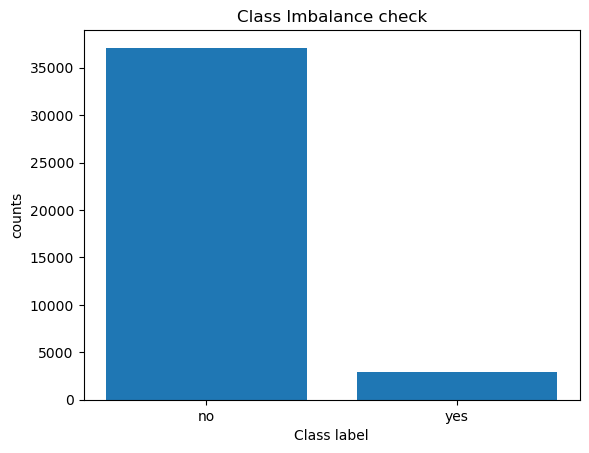

In [116]:
unique_values, counts=np.unique(y,return_counts=True)

plt.bar(unique_values,counts)
plt.xlabel('Class label')
plt.ylabel('counts')
plt.title('Class Imbalance check')

From above we see that the class is imbalanced which is not healthy to be fed into any algorithim for predictions as this increases the probability of misclassifying minority class. We will thus use a combination of oversampling and undersampling techniques. We will couple SMOTE to oversample our minority class coupled with unsersampling of majority class to balance the Target label.

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from numpy import mean

In [118]:
#Defining our base model
model=DecisionTreeClassifier()

#Evaluating raw dataset
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores=cross_val_score(model,x_train,y_train,scoring='f1_macro', cv=cv,n_jobs=1)
print('Mean f1_Score: %.2f' % mean(scores))

Mean f1_Score: 0.69


In [119]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline,Pipeline


In [120]:
#Defining pipeline
steps=[('over',SMOTE()),('model',DecisionTreeClassifier())]
pipeline=Pipeline(steps=steps)

#Evaluating the pipeline
scores=cross_val_score(pipeline,x_train,y_train,scoring='f1_macro', cv=cv,n_jobs=1)
print('Mean f1_Score: %.2f' % mean(scores))

Mean f1_Score: 0.69


In [121]:
# Applying Decision tree on imbalalnced dataset with SMOTE and Random undersampling

# values to evaluate
k_val=[1,2,3,4,5,6,7]
for k in k_val:
   over=SMOTE(k_neighbors=k,random_state=2)
   under=RandomUnderSampler(random_state=2)
   steps=[('over',over),('under',under),('model',model)]
   pipeline=make_pipeline(over,under,model)
   cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
   scores=cross_val_score(pipeline,x_train,y_train,scoring='f1_macro', cv=cv,n_jobs=1)
   score=mean(scores)
   print('> k=%d, Mean f1_Score: %.2f' % (k,score))

In [123]:

model=DecisionTreeClassifier()
over=SMOTE(k_neighbors=4,random_state=2)
under=RandomUnderSampler()
pipeline=make_pipeline(over,under)

x_sm,y_sm=pipeline.fit_resample(x_train,y_train)

In [124]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, the shape of train_X: {}".format(x_sm.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_sm == 0))) 


Before OverSampling, counts of label '1': 2297
Before OverSampling, counts of label '0': 29383 

After OverSampling, the shape of train_X: (58766, 12)
After OverSampling, the shape of train_y: (58766,) 

After OverSampling, counts of label '1': 29383
After OverSampling, counts of label '0': 29383


The dataset is transformed, first by oversampling the minority class followed by undersampling the majority class.

<BarContainer object of 2 artists>

Text(0.5, 0, 'Class label')

Text(0, 0.5, 'counts')

Text(0.5, 1.0, 'Class Imbalance check')

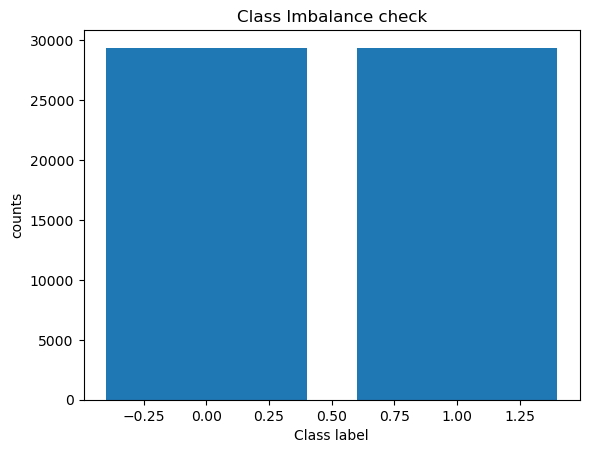

In [125]:
unique_values, counts=np.unique(y_sm,return_counts=True)

plt.bar(unique_values,counts)
plt.xlabel('Class label')
plt.ylabel('counts')
plt.title('Class Imbalance check')

In [126]:
from sklearn.metrics import f1_score

In [127]:
model=DecisionTreeClassifier()

#Evaluating the balanced dataset to see if there was improvement in baseline model after over and under sampling
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores=cross_val_score(model,x_sm,y_sm,scoring='f1_macro', cv=cv,n_jobs=1)
print('Mean f1_Score: %.2f' % mean(scores))

Mean f1_Score: 0.94


From above, we see that there was significant improvement of basline model after applying oversampling and undersammpling techniques. Now we can proceed to Model Building.

# Model Building

In [128]:
# Importing classification models

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [129]:
## Preparing list of models to try out in Spot-Checking process

# We will use this user defined function to select the base model and then further optimize the model that yileded the best results

# We will choose 2 extremes (21,1001) to check model performance across range and then sunject best model to gridsearch

def model_zoo(models_=dict()):

    # Tree models
    for n_tress in [21,1001]:
        models_['rf' + str(n_tress)]=RandomForestClassifier(n_estimators=n_tress, n_jobs=-1,criterion='entropy')

        models_['lgb' + str(n_tress)]=LGBMClassifier(boosting_type='dart',n_jobs=-1,importance_type='gain')

        models_['xgb' + str(n_tress)]=XGBClassifier(n_estimators=n_tress, n_jobs=-1, criterion='entropy')

        models_['xtra' + str(n_tress)]=ExtraTreesClassifier(n_estimators=n_tress,criterion='entropy',n_jobs=-1)

    # Logistic Model
    models_['Log_reg']=LogisticRegression(penalty='l2',n_jobs=-1)
                                               
    # KNN Model
    for n in [3,5,7,11]:
        models_['KNN' + str(n)]=KNeighborsClassifier(n_neighbors=n)


    # Naive-Bayes models
    models_['gauss_NB']=GaussianNB()
    # models_['Multinomial_NB']=MultinomialNB()
    # models_['Compl_NB']= ComplementNB()
    models_['bern_nb']=BernoulliNB()

    return models_    

In [130]:
# Running and evaluating all models using KFold cross-validation (5 folds)

def evaluate_models(x_sm,y_sm, models_, folds=5, metric='f1'):
    results=dict()

    for name, model in models_.items():
    
        scores=cross_val_score(model,x_sm,y_sm,cv=folds,scoring=metric,n_jobs=1)

        #Scoring results of the evaluated model
        results[name]=scores
        mu, sigma=np.mean(scores), np.std(scores)

        #Printing individual model results
        print('Model {}: mean= {}, std_dev= {}'. format(name, mu, sigma))

    return results    

In [131]:
models_=model_zoo()
results=evaluate_models(x_sm,y_sm, models_, folds=5, metric='f1_macro')

Model rf21: mean= 0.9611688731794734, std_dev= 0.0009655582932636131
[LightGBM] [Info] Number of positive: 23506, number of negative: 23506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 47012, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 23507, number of negative: 23506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 47013, number of used features: 12
[Lig

In [132]:
results

{'rf21': array([0.96093438, 0.96016133, 0.96297273, 0.96118767, 0.96058825]),
 'lgb21': array([0.93068339, 0.92871501, 0.93467462, 0.93528433, 0.93280304]),
 'xgb21': array([0.93462074, 0.93137912, 0.93214846, 0.93998411, 0.93411723]),
 'xtra21': array([0.96374522, 0.96595182, 0.96578387, 0.96561817, 0.96868022]),
 'rf1001': array([0.96212244, 0.96254456, 0.96552634, 0.96535841, 0.96135366]),
 'lgb1001': array([0.93068339, 0.92871501, 0.93467462, 0.93528433, 0.93280304]),
 'xgb1001': array([0.9660537 , 0.96426409, 0.96622129, 0.96809324, 0.96554063]),
 'xtra1001': array([0.96749139, 0.9676549 , 0.96995497, 0.96834049, 0.97021131]),
 'Log_reg': array([0.82483269, 0.81966925, 0.8209206 , 0.82473041, 0.82538358]),
 'KNN3': array([0.94516581, 0.94549817, 0.94883757, 0.9483284 , 0.94506752]),
 'KNN5': array([0.93959164, 0.93821377, 0.9420642 , 0.9409629 , 0.93914851]),
 'KNN7': array([0.93512912, 0.93324098, 0.93735448, 0.93710611, 0.93485978]),
 'KNN11': array([0.92921034, 0.92696621, 0.93

From above we see extra-tree and xgboost model returned the best reults. Thus I will proceed to Hyper-parameter tuning and then fit the tuned model over our validation set. 

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
# Selecting the best model from above and subjecting it to Gridsearch. 

# from above we see Extra tree classifier was the best performing model followed by xgboost
 
# Building list of parameters

params= {    'n_estimators':[50,100,200,300],
             'max_depth': [16,32,50,100,150],
             'min_samples_split':[2],
             'min_samples_leaf':[1],
             
}    


#'n_estimators':[int(x) for x in np.arange(start=10,stop=300,step=50)],
# 'max_depth': [int(x) for x in np.arange(start=10,stop=50,step=5)],


In [135]:
xtc=ExtraTreesClassifier(ExtraTreesClassifier(criterion='entropy',n_jobs=-1))

In [136]:
grid= GridSearchCV(xtc, param_grid=params, cv=5, scoring='f1', n_jobs=-1)
grid.fit(x_sm,y_sm)

GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(n_estimators=ExtraTreesClassifier(criterion='entropy',
                                                                              n_jobs=-1)),
             n_jobs=-1,
             param_grid={'max_depth': [16, 32, 50, 100, 150],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1')

In [137]:
grid.best_params_
grid.best_score_

{'max_depth': 150,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

0.9699114107802226

In [138]:
from sklearn.metrics import classification_report, confusion_matrix

GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(n_estimators=ExtraTreesClassifier(criterion='entropy',
                                                                              n_jobs=-1)),
             n_jobs=-1,
             param_grid={'max_depth': [16, 32, 50, 100, 150],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4006
           1       1.00      1.00      1.00       314

    accuracy                           1.00      4320
   macro avg       1.00      1.00      1.00      4320
weighted avg       1.00      1.00      1.00      4320



<Axes: >

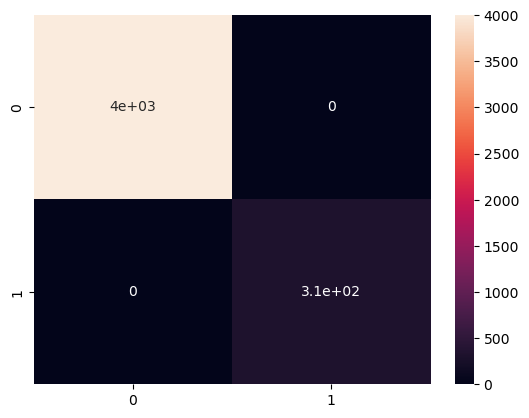

In [139]:
# Now using the above model to fit and measure performance on validation set

grid.fit(x_val,y_val)
xtc_GS_val=grid.predict(x_val)

print(classification_report(y_val,xtc_GS_val))
cm1=confusion_matrix(y_val,xtc_GS_val)
sns.heatmap(cm1,annot=True)

GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(n_estimators=ExtraTreesClassifier(criterion='entropy',
                                                                              n_jobs=-1)),
             n_jobs=-1,
             param_grid={'max_depth': [16, 32, 50, 100, 150],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3715
           1       1.00      1.00      1.00       285

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



<Axes: >

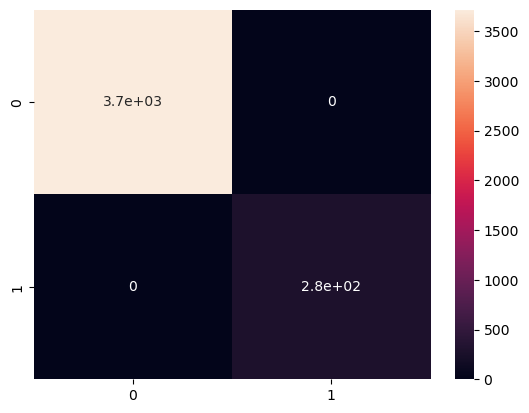

In [140]:
grid.fit(x_test,y_test)
xtc_GS_test_pred= grid.predict(x_test)


print(classification_report(y_test,xtc_GS_test_pred))
cm2=confusion_matrix(y_test,xtc_GS_test_pred)
sns.heatmap(cm2, annot=True)